### 2 Feature Selection- Drop Features using Pearson Correlation
In this Step we will be removing the features which are highly correlated

In [1]:
# Import Required Libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the dataset
data = load_boston()
df = pd.DataFrame(data.data, columns= data.feature_names)
df["MEDV"] = data.target

c:\Users\SAHIL JOSAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets inclu

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
X = df.drop("MEDV",axis = 1)
y = df['MEDV']

In [5]:
X.shape

(506, 13)

In [6]:
y.shape

(506,)

### Seperate dataset into train and test

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)
X_train.shape, X_test.shape

((354, 13), (152, 13))

### Pearson Correlation

In [8]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.196172,0.382073,-0.049364,0.416560,-0.188280,0.329927,-0.355840,0.603880,0.560570,0.264780,-0.299525,0.439369
ZN,-0.196172,1.000000,-0.529392,-0.063863,-0.523572,0.319260,-0.583885,0.658331,-0.314833,-0.327834,-0.392838,0.164641,-0.429178
INDUS,0.382073,-0.529392,1.000000,0.044224,0.750218,-0.392969,0.629257,-0.686848,0.578459,0.719038,0.388353,-0.331638,0.603374
CHAS,-0.049364,-0.063863,0.044224,1.000000,0.043748,0.088125,0.067269,-0.085492,0.022338,-0.017156,-0.072683,0.069682,-0.059060
NOX,0.416560,-0.523572,0.750218,0.043748,1.000000,-0.279202,0.740052,-0.765753,0.627188,0.683445,0.179046,-0.369445,0.577154
RM,-0.188280,0.319260,-0.392969,0.088125,-0.279202,1.000000,-0.235839,0.183857,-0.179242,-0.275242,-0.385526,0.157459,-0.623920
AGE,0.329927,-0.583885,0.629257,0.067269,0.740052,-0.235839,1.000000,-0.761543,0.440578,0.502429,0.239729,-0.250416,0.606530
DIS,-0.355840,0.658331,-0.686848,-0.085492,-0.765753,0.183857,-0.761543,1.000000,-0.467653,-0.519643,-0.176620,0.248376,-0.501780
RAD,0.603880,-0.314833,0.578459,0.022338,0.627188,-0.179242,0.440578,-0.467653,1.000000,0.907455,0.437687,-0.415325,0.442783
TAX,0.560570,-0.327834,0.719038,-0.017156,0.683445,-0.275242,0.502429,-0.519643,0.907455,1.000000,0.447518,-0.412145,0.515905


<AxesSubplot:>

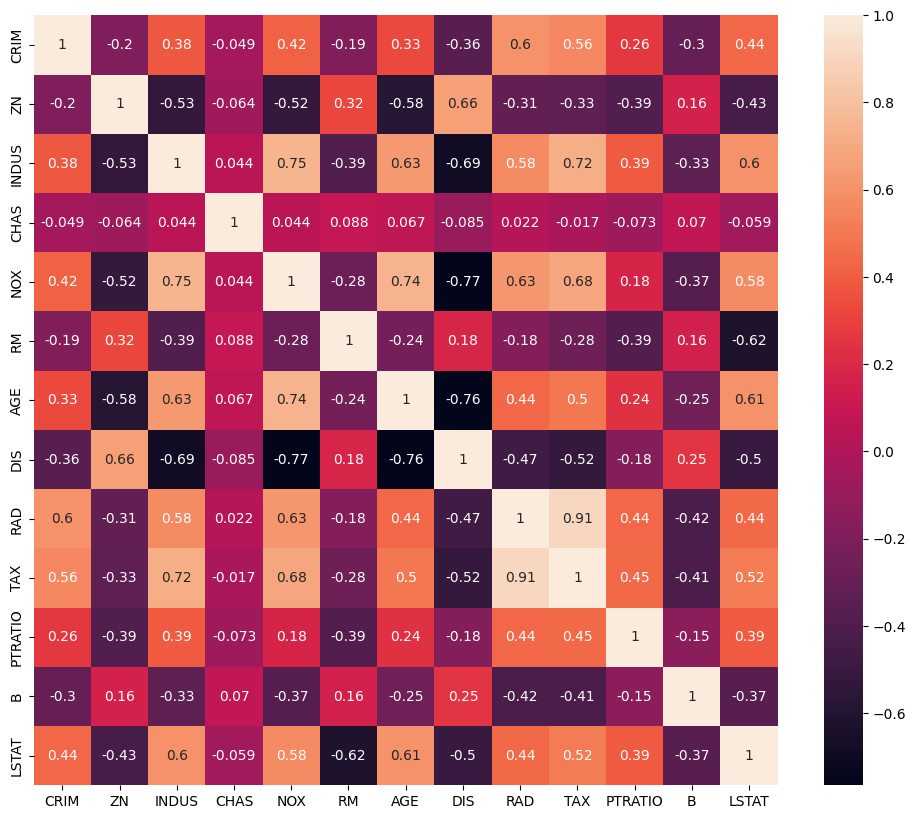

In [9]:
import seaborn as sns
# using Pearson Correlation

plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot = True, cmap = "rocket")

Here we can see features "RAD" and "Tax" are more then 90% correlated .<br> 
So we can drop one of them .. <br>
But as there are so many numbers we write a funtion to check which feature are highly correlated to each other .

In [12]:
# With the following function we can select highly correlated features
# it will remove the first feature that is correlated with any other feature
def correlation(dataset, threshold):
    col_corr = set()                                   # set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: # We are interested in absolute coeff value
                colname = corr_matrix.columns[i]       # getting the name of column
                col_corr.add(colname)
    return col_corr

In [20]:
corr_features = correlation(X_train,0.7)  # Threshold = 0.7
print(corr_features)
len(set(corr_features))


{'NOX', 'TAX', 'DIS', 'AGE'}


4

As we have seen that the 4 feature which are more then 70% correlated are "NOX", "TAX", "Dis", "AGE", so we can remove this features.

### Note:
To avoid overfitting, we will not do all this process with X_test <br>
This process will apply only on X_train <br>
And Suppose we find out that in X_train `1` Features are highly correlated <br>
We will remove these features from X_test also

In [21]:
X_train.drop(corr_features,axis =1) # Drop Highly Correlated Features in X_train Dataset
X_test.drop(corr_features,axis =1) # Drop Highly Correlated Features in X_test Dataset also

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,6.333,4.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,6.216,24.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,6.373,5.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,5.349,24.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,6.232,5.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,7.147,3.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0.0,6.193,24.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,5.277,24.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,6.635,4.0,18.4,396.90,4.54


### Apply Pearson Correlation to Big Dataset

In [22]:
df = pd.read_csv(r"G:\Udemy\DATA SCIENCE ineuron\Resources\Dataset\santander-customer-satisfaction Train.csv",nrows=10000)
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [29]:
print(f"We Have:{df.shape[1]} features and {df.shape[0]} rows")

We Have:371 features and 10000 rows


### Feature Selection using Pearson Correlation

In [32]:
X = df.drop("TARGET",axis = 1)
y = df['TARGET']

# Separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

<AxesSubplot:>

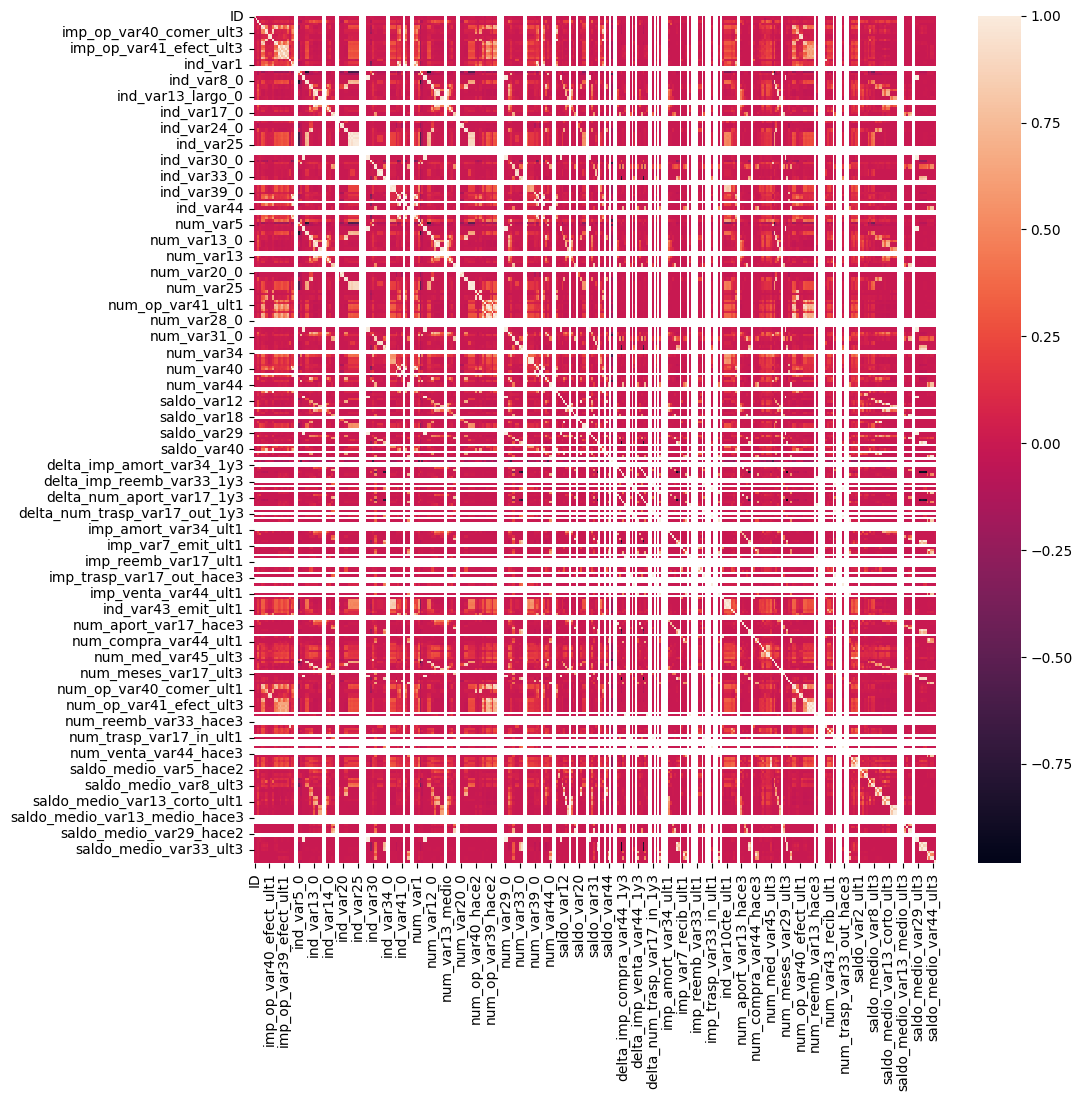

In [35]:
import seaborn as sns
# Using Pearson Correlation
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [38]:
# Pearson Correlation
corrmat = X_train.corr()
corrmat

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,1.000000,0.003868,-0.007921,0.026313,0.010195,0.003226,-0.001037,-0.008416,0.009563,0.001776,...,-0.016729,-0.015758,-0.010380,-0.013348,-0.012468,-0.004889,0.008355,-0.010153,-0.007876,-0.003619
var3,0.003868,1.000000,-0.009840,0.000892,0.004527,0.004604,0.000984,0.001146,0.000417,0.000477,...,0.000247,0.000412,0.000428,0.000433,0.000452,0.000570,0.000337,0.000671,0.000669,-0.000065
var15,-0.007921,-0.009840,1.000000,0.033884,0.117646,0.124938,0.059411,0.074257,0.018217,0.019172,...,0.019788,0.026903,0.024832,0.027281,0.027676,0.022812,0.031673,0.024141,0.023195,-0.005522
imp_ent_var16_ult1,0.026313,0.000892,0.033884,1.000000,0.017469,0.015492,0.010331,0.007650,-0.000866,-0.000991,...,0.037854,-0.000822,-0.000812,-0.000867,-0.000899,-0.001184,-0.000700,-0.001394,-0.001391,0.001352
imp_op_var39_comer_ult1,0.010195,0.004527,0.117646,0.017469,1.000000,0.877170,0.506263,0.455786,0.052864,0.068169,...,0.016903,0.017639,0.044972,0.024841,0.032876,-0.001352,-0.003516,0.000278,0.000051,0.006273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace2,-0.004889,0.000570,0.022812,-0.001184,-0.001352,0.001320,-0.001268,-0.001421,-0.000555,-0.000636,...,-0.000329,-0.000527,-0.000521,-0.000556,-0.000576,1.000000,0.617695,0.920544,0.933605,0.000002
saldo_medio_var44_hace3,0.008355,0.000337,0.031673,-0.000700,-0.003516,0.000460,-0.000750,-0.000840,-0.000328,-0.000376,...,-0.000195,-0.000312,-0.000308,-0.000329,-0.000341,0.617695,1.000000,0.521398,0.474861,-0.004989
saldo_medio_var44_ult1,-0.010153,0.000671,0.024141,-0.001394,0.000278,0.000916,-0.001492,-0.001672,-0.000654,-0.000748,...,-0.000388,-0.000621,-0.000613,-0.000655,-0.000679,0.920544,0.521398,1.000000,0.983012,-0.000798
saldo_medio_var44_ult3,-0.007876,0.000669,0.023195,-0.001391,0.000051,0.000364,-0.001489,-0.001669,-0.000652,-0.000747,...,-0.000387,-0.000620,-0.000612,-0.000653,-0.000677,0.933605,0.474861,0.983012,1.000000,0.000160


Now to find how many features are highly correlated we use the function

In [39]:
def correlation(dataset, threshold):
    col_corr = set()                                   # set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: # We are interested in absolute coeff value
                colname = corr_matrix.columns[i]       # getting the name of column
                col_corr.add(colname)
    return col_corr

In [48]:
Hicor = correlation(X_train,0.9)    # Threshold = 0.9
print(len(set(Hicor)), ": Features are More then 90% Correlated")
print(set(Hicor))


156 : Features are More then 90% Correlated
{'ind_var25', 'num_var33', 'num_var44', 'saldo_medio_var13_corto_hace2', 'num_var39', 'num_reemb_var13_ult1', 'saldo_var42', 'delta_num_trasp_var17_in_1y3', 'num_var31', 'ind_var31', 'num_op_var39_hace2', 'ind_var10cte_ult1', 'num_var45_ult3', 'ind_var24', 'saldo_medio_var13_corto_ult3', 'num_var12_0', 'imp_op_var39_efect_ult1', 'saldo_medio_var13_corto_ult1', 'ind_var39', 'num_meses_var33_ult3', 'num_op_var40_efect_ult3', 'num_op_var40_comer_ult3', 'num_var20_0', 'num_var6_0', 'delta_num_aport_var17_1y3', 'num_var12', 'imp_op_var40_ult1', 'ind_var13', 'num_var39_0', 'ind_var37', 'saldo_var17', 'num_var37', 'ind_var13_largo', 'delta_num_trasp_var33_in_1y3', 'num_var6', 'saldo_medio_var29_ult3', 'imp_reemb_var13_ult1', 'num_compra_var44_hace3', 'saldo_var6', 'num_op_var40_ult3', 'num_aport_var13_ult1', 'num_meses_var13_corto_ult3', 'num_var33_0', 'num_var26_0', 'num_med_var22_ult3', 'ind_var9_ult1', 'ind_var32', 'ind_var20', 'num_meses_var8_ul

- Now We can drop these more then 90% correlated features from X_train and X_test

In [50]:
X_train.drop(Hicor, axis = 1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var41_comer_ult1,...,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var44_hace2,var38
7681,15431,2,42,840.0,4477.02,4989.54,0.0,0.0,0,4477.02,...,0,0,0,0,0.0,0.0,0.0,0,0.0,37491.21
9031,18181,2,31,0.0,52.32,52.32,0.0,0.0,0,52.32,...,0,0,0,0,0.0,0.0,0.0,0,0.0,106685.94
3691,7411,2,51,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,66144.66
202,407,2,36,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,92121.36
5625,11280,2,23,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,74650.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,18564,2,33,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,117547.89
4859,9723,2,24,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,71050.83
3264,6557,2,24,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,141069.33
9845,19796,2,38,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,86412.15


In [51]:
X_test.drop(Hicor, axis = 1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var41_comer_ult1,...,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var44_hace2,var38
9394,18882,2,23,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,75170.310000
898,1778,2,79,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,57855.510000
2398,4806,2,38,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,117310.979016
5906,11854,2,48,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,50659.230000
2343,4697,2,23,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,43843.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,8026,2,28,0.0,237.45,237.45,0.0,0.0,0,237.45,...,0,0,0,0,0.0,0.0,0.0,0,0.0,103622.310000
7375,14795,2,23,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,51898.800000
9307,18726,2,25,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,99251.790000
8394,16923,2,50,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,117310.979016


## END